In [1]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [4]:
d = 'ELife/FinalDI/xradd'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)

In [7]:
m = build.Model(data=redata, kind='xradd', dynamic='hyp', tb=.650, depends_on={'v':'Cond'})

m.flat_y=m.avg_y[0]
m.flat_wts=m.avg_wts[0]

m.make_optimizer(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)
opt=m.opt
opt.make_simulator()

opt.flat_y=m.avg_y[0]
opt.flat_wts=m.avg_wts[0]
opt.fitparams['flat_y']=m.avg_y[0]
opt.fitparams['flat_wts']=m.avg_wts[0]

In [8]:
fp = opt.fitparams
# p0: (Initials/Global Minimum)
p0 = dict(deepcopy(opt.inits))
p0X = opt.hop_around(p0)
yh1, finfo1, p1 = opt.gradient_descent(y=opt.flat_y, wts=opt.flat_wts, inits=p0X, is_flat=True)

basinhopping step 0: f 0.00695996
basinhopping step 1: f 0.0203712 trial_f 0.0203712 accepted 1  lowest_f 0.00695996
basinhopping step 2: f 0.16729 trial_f 0.16729 accepted 1  lowest_f 0.00695996
basinhopping step 3: f 0.029504 trial_f 0.029504 accepted 1  lowest_f 0.00695996
basinhopping step 4: f 0.0977051 trial_f 0.0977051 accepted 1  lowest_f 0.00695996
basinhopping step 5: f 0.0236586 trial_f 0.0236586 accepted 1  lowest_f 0.00695996
basinhopping step 6: f 0.0584837 trial_f 0.0584837 accepted 1  lowest_f 0.00695996
basinhopping step 7: f 0.0401235 trial_f 0.0401235 accepted 1  lowest_f 0.00695996
basinhopping step 8: f 0.0658378 trial_f 0.0658378 accepted 1  lowest_f 0.00695996
basinhopping step 9: f 0.277976 trial_f 0.277976 accepted 1  lowest_f 0.00695996
adaptive stepsize: acceptance rate 0.900000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.191193 trial_f 0.191193 accepted 1  lowest_f 0.00695996
basinhopping step 11: f 0.0885786 trial_f 0.

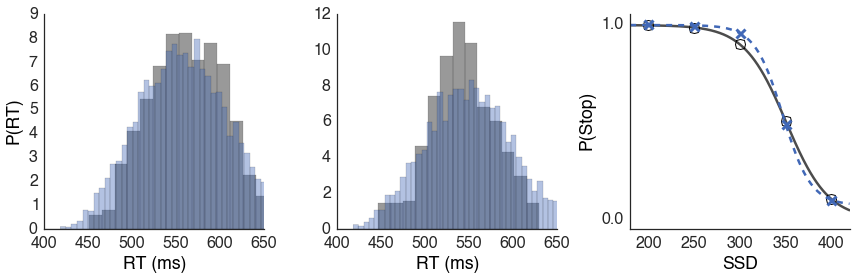

In [17]:
finfo1.to_csv('finfo.csv')
m.fits=np.tile(yh1,2).reshape(2,16)
m.popt=p1
vis.react_fit_plots(m, is_flat=True, save=True)